   Gender Married     Education  ApplicantIncome  LoanAmount  Credit_History  \
0    Male      No      Graduate             4863         431               1   
1  Female     Yes  Not Graduate            12693         694               0   
2    Male     Yes  Not Graduate            12139         276               1   
3    Male     Yes  Not Graduate             3177         525               0   
4    Male     Yes  Not Graduate             6760         526               0   

  Loan_Status  
0    Approved  
1    Rejected  
2    Rejected  
3    Approved  
4    Approved  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1000 non-null   object
 1   Married          1000 non-null   object
 2   Education        1000 non-null   object
 3   ApplicantIncome  1000 non-null   int64 
 4   LoanAmount       1000 non-null   int64 
 5 

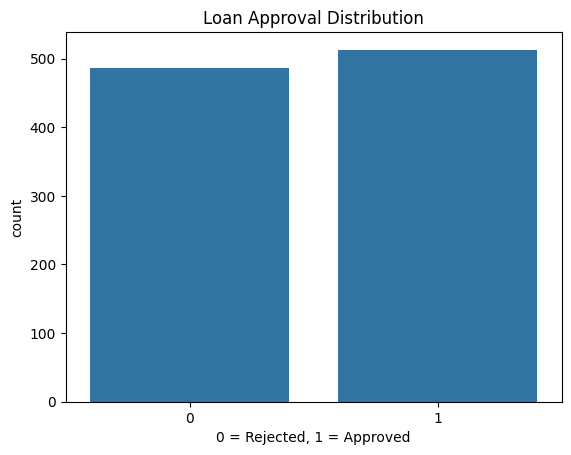

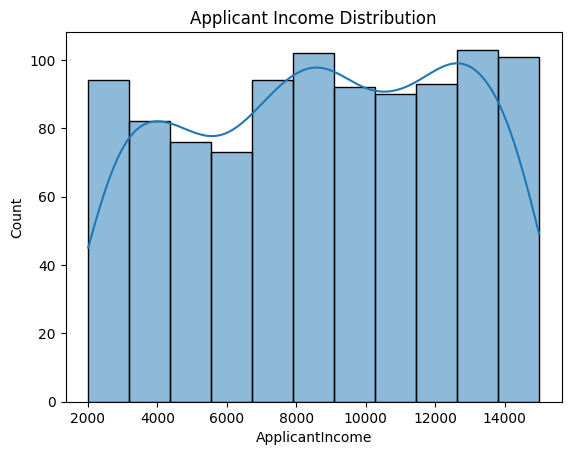

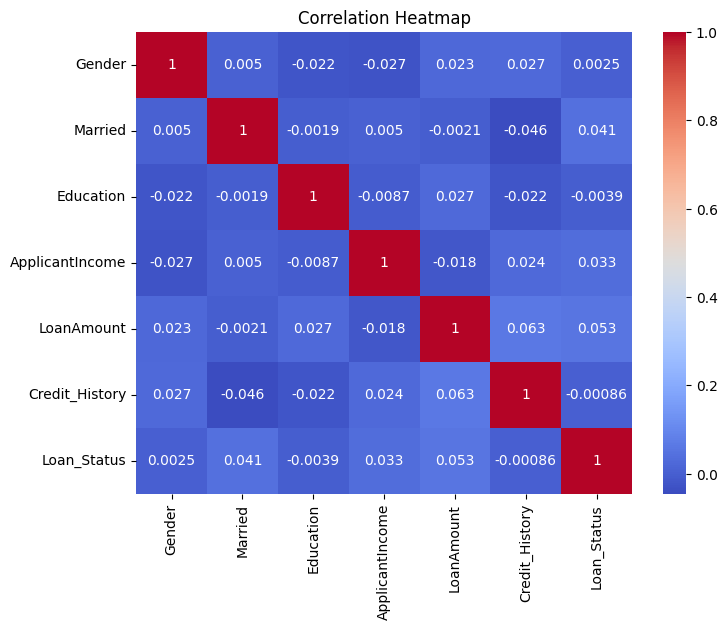


Accuracy Score: 0.52

Confusion Matrix:
 [[40 51]
 [45 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.44      0.45        91
           1       0.56      0.59      0.57       109

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.52       200


Final Dataset Preview:
   Gender  Married  Education  ApplicantIncome  LoanAmount  Credit_History  \
0       1        0          0             4863         431               1   
1       0        1          1            12693         694               0   
2       1        1          1            12139         276               1   
3       1        1          1             3177         525               0   
4       1        1          1             6760         526               0   
5       0        1          0             2011         314               0   
6       1        

In [1]:
# -*- coding: utf-8 -*-
"""
Loan_Approval_Prediction.ipynb

Machine Learning project to predict loan approval status
"""

# -----------------------------
# Import required libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# Dataset Creation (1000 Records)
# -----------------------------
np.random.seed(42)

data = {
    "Gender": np.random.choice(["Male", "Female"], 1000),
    "Married": np.random.choice(["Yes", "No"], 1000),
    "Education": np.random.choice(["Graduate", "Not Graduate"], 1000),
    "ApplicantIncome": np.random.randint(2000, 15000, 1000),
    "LoanAmount": np.random.randint(50, 700, 1000),
    "Credit_History": np.random.choice([0, 1], 1000),
    "Loan_Status": np.random.choice(["Approved", "Rejected"], 1000)
}

df = pd.DataFrame(data)

# -----------------------------
# Display sample dataset
# -----------------------------
print(df.head())

# Dataset information
df.info()

# -----------------------------
# Remove duplicate records
# -----------------------------
df.drop_duplicates(inplace=True)

# -----------------------------
# Encode categorical columns
# -----------------------------
le = LabelEncoder()
categorical_cols = ["Gender", "Married", "Education", "Loan_Status"]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# -----------------------------
# Exploratory Data Analysis (EDA)
# -----------------------------

# Loan status distribution
plt.figure()
sns.countplot(x=df["Loan_Status"])
plt.title("Loan Approval Distribution")
plt.xlabel("0 = Rejected, 1 = Approved")
plt.show()

# Applicant income distribution
plt.figure()
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# Feature Selection
# -----------------------------
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Model Building
# -----------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Model Evaluation
# -----------------------------
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Display dataset (optional)
# -----------------------------
print("\nFinal Dataset Preview:")
print(df.head(10))

